### Sum of Poisson Random Variables

The poisson distribution gives the probability of observing $k$ events within $\lambda = ct$ time.


#### The long way

\begin{equation}
p(k) = \frac{\lambda^k e^{-\lambda}}{k!}
\end{equation}

The sum of a set of $n$ poisson random variables has probability:

\begin{equation}
\begin{array}{ll}
p(s) &= \sum_{\sum k_i = s} \frac{\lambda^{k_1}...\lambda^{k_n} e^{-n\lambda}}{k_1!...k_n!}\\
&= \frac{e^{-n\lambda}}{s!} \sum_{\sum k_i = s} \left(\begin{array}{c} s \\ k_1...k_n\end{array}\right)\lambda^{k_1}...\lambda^{k_n}\\
&= \frac{(n\lambda)^s e^{-n\lambda}}{s!}
\end{array}
\end{equation}

Where the second step made use of the multinomial expansion.

#### The quick way, using moment generating functions

For a linear combination of independent random variables $y=\sum a_i X_i$, the moment generating function is given by: 

\begin{equation}
M_y(t) = \prod_i M_i(t) = \prod_i \left< e^{X_it} \right>
\end{equation}

In this case, then:

\begin{equation}
M_y(t) = \prod_i \exp\left(\lambda_i (e^t -1) \right) = \exp\left(n\lambda(e^t-1)\right)
\end{equation}

Which is the moment generating function of a poisson random variable with parameter $n\lambda$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


n = 5
samples = 5000

lam = 1

X = np.random.poisson(lam=lam,size=[n,samples])
Y = np.sum(X,axis=0)

def factorial(x):
    if x == 0:
        return 1
    else:
        res = 1
        for i in range(1,x+1):
            res *= i
        return res

def p_x(x,lam=lam):
    return lam**x * np.exp(-lam) / factorial(x)

def p_s(x,n,lam=lam):
    return p_x(x,lam=n*lam)

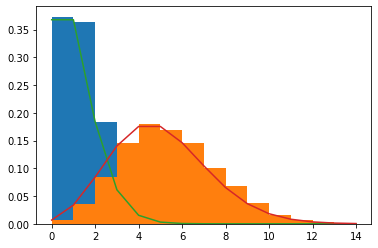

In [2]:
x = list(range(15))
_ = plt.hist(X.flatten(),bins = x,density=True)
_ = plt.hist(Y,bins=x,density=True)

plt.plot(x,[p_x(i) for i in x])
plt.plot(x,[p_s(i,n) for i in x])